<a href="https://colab.research.google.com/github/Glasiermedic/Natural-Language-process/blob/master/NLP_Author_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing packages

import numpy as np
import pandas as pd
import scipy
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import urllib.request
import glob
from collections import Counter
import nltk
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans, KMeans, MeanShift
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import estimate_bandwidth, SpectralClustering, AffinityPropagation
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import time
sns.set_style("white")
nlp = spacy.load('en')

In [ ]:
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = clean_punct(text)
    text = ' '.join(text.split())
    
    return text

In [ ]:
def get_texts(text_url):
    values = {'q' : 'python programming tutorials'}
    data = urllib.parse.urlencode(values)
    data = data.encode('utf-8') # data should be bytes
    req = urllib.request.Request(text_url, data)
    resp = urllib.request.urlopen(req)
    respData = resp.read()
    text = respData.decode("utf-8")
    text = text.replace('_','')
    text = text.replace('\xa0', '')
    text = text.replace(',—', ', ')
    text = text.replace('--', ' - ')
    text = clean_punct(text)
    return text

In [ ]:
def clean_punct(text):
    text = text.replace('"','')
    text = text.replace('“','')
    text = text.replace('”','')
    text = text.replace('\'','')
    text = text.replace('.',' .')
    text = text.replace(',',' ')
    text = text.replace('?',' ?')
    text = text.replace('!',' !')
    text = text.replace(':',' :')
    text = text.replace(';',' ;')
    text = text.replace('(','( ')
    text = text.replace(')',' )')
    text = text.replace('-', ' - ')
    text = text.replace('\r', '')
    text = text.replace('\n', '')
    text = text.replace('[', '')
    text = text.replace(']', '')
    return text

In [ ]:
def text_preprocess(http_text, Author, text, text_name):
  %%time
  text = get_texts(http_text)[:200000]
  
  print (text_name , ": " , len(text))

  
  #text_sent_name = [[sent, Author, text_name] for sent in text_doc.sents]

  #return text_sent_name, text
  return text

In [ ]:
shakespeare_corp = []
austin_corp = []
wells_corp = []
dickens_corp = []
carroll_corp = []
doyle_corp = []
twain_corp = []

### Creating the corpus of works for each Author
#### Importing and then appending each work to a single list

In [ ]:
shakespeare_corp.append(text_preprocess("https://www.gutenberg.org/files/1522/1522-0.txt","William Shakespeare", "caesar", "Caesar"))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
Caesar :  134639


In [ ]:
shakespeare_corp.append(text_preprocess("https://www.gutenberg.org/files/1533/1533-0.txt","William Shakespeare", "macbeth", "Macbeth"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs
Macbeth :  122686


In [ ]:
shakespeare_corp.append(text_preprocess("http://www.gutenberg.org/cache/epub/1041/pg1041.txt","William Shakespeare", "sonnets", "Shakespeare's Sonnets"))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs
Shakespeare's Sonnets :  117774


In [ ]:
shakespeare_corp.append(text_preprocess("https://www.gutenberg.org/files/1514/1514-0.txt","William Shakespeare", "summer_dream", "A Midsummer Night's Dream"))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.48 µs
A Midsummer Night's Dream :  115481


In [ ]:
shakespeare_corp.append(text_preprocess("https://www.gutenberg.org/files/23042/23042-0.txt","William Shakespeare", "tempest", "The Tempest"))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
The Tempest :  165371


In [ ]:
shakespeare_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/1779/pg1779.txt',"William Shakespeare", "merchant", "The Merchant of Venice"))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
The Merchant of Venice :  141446


In [ ]:
#shakespeare_corp[:]

In [ ]:
austin_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/105/pg105.txt',"Jane Austin", "persuasion", "Persuasion"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
Persuasion :  200000


In [ ]:
austin_corp.append(text_preprocess('https://www.gutenberg.org/files/158/158-0.txt',"Jane Austen", "emma", "Emma"))

CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 6.91 µs
Emma :  200000


In [ ]:
austin_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/161/pg161.txt',"Jane Austen", "sense", "Sense & Sensability"))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs
Sense & Sensability :  200000


In [ ]:
austin_corp.append(text_preprocess('https://www.gutenberg.org/files/1342/1342-0.txt',"Jane Austen", "pride", "Pride and Predjudice"))

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 21 µs
Pride and Predjudice :  200000


In [ ]:
austin_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/946/pg946.txt',"Jane Austen", "lady", "Lady Susan"))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs
Lady Susan :  145558


In [ ]:
austin_corp.append(text_preprocess('https://www.gutenberg.org/files/141/141-0.txt',"Jane Austen", "mansfield", "Mansfield Park"))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
Mansfield Park :  200000


In [ ]:
austin_corp.append(text_preprocess('https://www.gutenberg.org/files/121/121-0.txt',"Jane Austen", "northanger", "Northanger Abbey"))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
Northanger Abbey :  200000


In [ ]:
#austin_corp[:]

In [ ]:
wells_corp.append(text_preprocess('http://www.gutenberg.org/files/35/35-0.txt',"H.G. Wells", "time", "The Time Machine"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 17.4 µs
The Time Machine :  197790


In [ ]:
wells_corp.append(text_preprocess('http://www.gutenberg.org/files/36/36-0.txt',"H.G. Wells", "war", "War of the Worlds"))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs
War of the Worlds :  200000


In [ ]:
wells_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/159/pg159.txt',"H.G. Wells", "island", "Island of Morreau"))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Island of Morreau :  200000


In [ ]:
wells_corp.append(text_preprocess('https://www.gutenberg.org/files/59774/59774-0.txt',"H.G. Wells", "strange", "Thirty Strange Stories"))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
Thirty Strange Stories :  200000


In [ ]:
wells_corp.append(text_preprocess('http://www.gutenberg.org/files/1059/1059-0.txt',"H.G. Wells", "world", "World Set Free"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
World Set Free :  200000


In [ ]:
wells_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/5230/pg5230.txt',"H.G. Wells", "invisible", "The Invisible Man"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs
The Invisible Man :  200000


In [ ]:
wells_corp.append(text_preprocess('https://www.gutenberg.org/files/60173/60173-0.txt',"H.G. Wells", "russia", "Russia in the Shadows"))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Russia in the Shadows :  151675


In [ ]:
wells_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/1013/pg1013.txt',"H.G. Wells", "moon", "The First Men in the Moon"))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
The First Men in the Moon :  200000


In [ ]:
#wells_corp[:]

In [ ]:
dickens_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/1407/pg1407.txt',"Charles Dickens", "sea", "A Message from the Sea"))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
A Message from the Sea :  87086


In [ ]:
dickens_corp.append(text_preprocess('https://www.gutenberg.org/files/1400/1400-0.txt',"Charles Dickens", "expectations", "Great Expectations"))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
Great Expectations :  200000


In [ ]:
dickens_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/1422/pg1422.txt',"Charles Dickens", "society", "Going into Society"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs
Going into Society :  46666


In [ ]:
dickens_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/20795/pg20795.txt',"Charles Dickens", "cricket", "The Cricket Hearth"))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
The Cricket Hearth :  198087


In [ ]:
dickens_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/19337/pg19337.txt',"Charles Dickens", "carol", "A Christmas Carol"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
A Christmas Carol :  180746


In [ ]:
dickens_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/25985/pg25985.txt',"Charles Dickens", "bardell", "Bardell vs. Pickwick"))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Bardell vs. Pickwick :  200000


In [ ]:
dickens_corp.append(text_preprocess('http://www.gutenberg.org/files/675/675-0.txt',"Charles Dickens", "american", "American Notes"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
American Notes :  200000


In [ ]:
dickens_corp.append(text_preprocess('http://www.gutenberg.org/files/676/676-0.txt',"Charles Dickens", "battle", "THe Battle of Life"))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
THe Battle of Life :  187616


In [ ]:
#dickens_corp[:]

In [ ]:
carroll_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/35688/pg35688.txt', "Lewis Carroll", "alice", "Alice in Wonderland"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs
Alice in Wonderland :  99223


In [ ]:
carroll_corp.append(text_preprocess('https://www.gutenberg.org/files/12/12-0.txt', "Lewis Carroll", "looking", "Through the Looking Glass"))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
Through the Looking Glass :  181615


In [ ]:
carroll_corp.append(text_preprocess('https://www.gutenberg.org/files/13/13-0.txt', "Lewis Carroll", "hunting", "The Hunting of the Snark"))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
The Hunting of the Snark :  52014


In [ ]:
carroll_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/4763/pg4763.txt', "Lewis Carroll", "game", "The Game of Logic"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
The Game of Logic :  141419


In [ ]:
carroll_corp.append(text_preprocess('https://www.gutenberg.org/files/651/651-0.txt', "Lewis Carroll", "phantas", "Phantasmagoria"))

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 15.5 µs
Phantasmagoria :  101993


In [ ]:
carroll_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/29042/pg29042.txt', "Lewis Carroll", "tangled", "A Tangled Tale"))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs
A Tangled Tale :  177618


In [ ]:
#carroll_corp[:]

In [ ]:
doyle_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/2346/pg2346.txt', "Arthur Conan Doyle", "plans", "The adventure of Bruce-Parington Plans"))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs
The adventure of Bruce-Parington Plans :  78441


In [ ]:
doyle_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/2344/pg2344.txt', "Arthur Conan Doyle", "phantas", "The Adventure of the Cardboard Box"))

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.01 µs
The Adventure of the Cardboard Box :  65142


In [ ]:
doyle_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/2349/pg2349.txt', "Arthur Conan Doyle", "foot", "The Adventure of the Devil's Foot"))

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 6.2 µs
The Adventure of the Devil's Foot :  74552


In [ ]:
doyle_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/2347/pg2347.txt', "Arthur Conan Doyle", "dying", "The Adventure of the dying detective"))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.63 µs
The Adventure of the dying detective :  50773


In [ ]:
doyle_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/2345/pg2345.txt', "Arthur Conan Doyle", "red", "The Adventure of the Red Circle"))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
The Adventure of the Red Circle :  59124


In [ ]:
doyle_corp.append(text_preprocess('http://www.gutenberg.org/cache/epub/2343/pg2343.txt', "Arthur Conan Doyle", "phantas", "Phantasmagoria"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs
Phantasmagoria :  81484


In [ ]:
doyle_corp.append(text_preprocess('https://www.gutenberg.org/files/1644/1644-0.txt', "Arthur Conan Doyle", "gerard", "The Adventures of Gerard"))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
The Adventures of Gerard :  200000


In [ ]:
doyle_corp.append(text_preprocess('https://www.gutenberg.org/files/1661/1661-0.txt', "Arthur Conan Doyle", "phantas", "Phantasmagoria"))

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.25 µs
Phantasmagoria :  200000


In [ ]:
#len(doyle_corp)

In [ ]:
twain_corp.append(text_preprocess("https://www.gutenberg.org/files/76/76-0.txt","Mark Twain", "huck", "Adventures of Huckleberry FInn"))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
Adventures of Huckleberry FInn :  200000


In [ ]:
twain_corp.append(text_preprocess("http://www.gutenberg.org/files/3179/3179-0.txt","Mark Twain", "Claimant", "The American Claimant"))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs
The American Claimant :  200000


In [ ]:
twain_corp.append(text_preprocess("http://www.gutenberg.org/files/86/86-0.txt","Mark Twain", "yankee", "A Connecticut Yankee in King Arthur's Court"))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs
A Connecticut Yankee in King Arthur's Court :  200000


In [ ]:
twain_corp.append(text_preprocess("http://www.gutenberg.org/files/3174/3174-0.txt","Mark Twain", "dog", "A Dog's Tale"))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
A Dog's Tale :  42028


In [ ]:
twain_corp.append(text_preprocess("http://www.gutenberg.org/files/8525/8525-0.txt","Mark Twain", "eve", "Eve's Diary"))

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.48 µs
Eve's Diary :  53837


In [ ]:
twain_corp.append(text_preprocess("http://www.gutenberg.org/files/2895/2895-0.txt","Mark Twain", "equator", "Follow the Equator"))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
Follow the Equator :  200000


In [ ]:
twain_corp.append(text_preprocess("http://www.gutenberg.org/files/245/245-0.txt","Mark Twain", "life", "Life on the Mississippi"))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
Life on the Mississippi :  200000


In [ ]:
twain_corp.append(text_preprocess("http://www.gutenberg.org/files/1837/1837-0.txt","Mark Twain", "pauper", "The Prince and the Pauper"))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
The Prince and the Pauper :  200000


In [ ]:
twain_corp.append(text_preprocess("http://www.gutenberg.org/files/3181/3181-0.txt","Mark Twain", "huck", "The Stolen White Elephant"))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs
The Stolen White Elephant :  59565


In [ ]:
#twain_corp[:]

### Creating a dictionary for the Authors to use throughout the project

In [ ]:
#dictionary of authors

auth_dict ={0: 'shakespeare',
            1: 'austin',
            2: 'wells' , 
            3: 'dickens', 
            4: 'carroll', 
           5: 'doyle', 
           6: 'twain'}

In [ ]:
#list of authors in same order

authors = list(auth_dict.values())

In [ ]:
#creating list where each element is a list of author files

all_uncleaned_work_auth = [shakespeare_corp, austin_corp, wells_corp, dickens_corp, carroll_corp, doyle_corp, twain_corp]

In [ ]:
for all in all_uncleaned_work_auth:
  print (len(all))

6
7
8
8
6
8
9


In [ ]:
#getting a list of the number of works by each author

num_works_auth = [len(all_uncleaned_work_auth[author_number])
                 for author_number in range(len(all_uncleaned_work_auth))]

### Creating a figure representing the distribution of works for each author

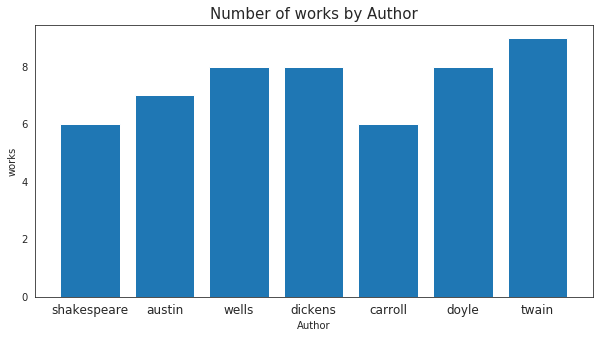

In [ ]:
plt.figure(figsize= (10,5))
plt.bar(height = num_works_auth, x = authors)
plt.title('Number of works by Author', fontsize = 15)
plt.ylabel('works')
plt.xlabel("Author")
plt.xticks(fontsize = 12)
plt.show()

In [ ]:
#Creating a list of how many works per author there are

print("Number of works by Author")
for index, author in enumerate(authors):
  print(num_works_auth[index], authors[index])
  
print('\nTotal Number of works: {}'.format(np.sum(num_works_auth)))

Number of works by Author
6 shakespeare
7 austin
8 wells
8 dickens
6 carroll
8 doyle
9 twain

Total Number of works: 52


### Cleaning all the text files and converting them to a spacy doc

In [ ]:
# looping through each file and applying the text_cleaner function
all_cleaned_files_by_auth = []
for index, auth_files in enumerate(all_uncleaned_work_auth):
    all_cleaned_files_for_this_auth = []
    all_cleaned_files_by_auth.append(all_cleaned_files_for_this_auth)
    for file in auth_files:
        all_cleaned_files_for_this_auth.append(text_cleaner(file))

# renaming all_cleaned_files_by_auth simply all_files_by_auth
all_files_by_auth = all_cleaned_files_by_auth       
  

# looping through each cleaned file and converting it to a spacy doc.  
all_docs_by_auth = []
for index, auth_file in enumerate(all_files_by_auth):
    all_docs_for_this_auth = []
    all_docs_by_auth.append(all_docs_for_this_auth)
    for file in auth_file:
        all_docs_for_this_auth.append(nlp(file))
    print('converted the {} files to docs'.format(auth_dict[index]))

converted the shakespeare files to docs
converted the austin files to docs
converted the wells files to docs
converted the dickens files to docs
converted the carroll files to docs
converted the doyle files to docs
converted the twain files to docs


### Converting files into a list then an array with the author added to each file

In [ ]:
# Now creating lists to use for converting into a dataframe

list_doc_n_auth = []
for auth_number in range(len(all_docs_by_auth)):
  list_doc_n_auth.extend([[doc, auth_dict[auth_number]]
                         for doc in all_docs_by_auth[auth_number]])

In [ ]:
list_file_n_auth = []
for auth_number in range(len(all_files_by_auth)):
  list_file_n_auth.extend([[file, auth_dict[auth_number]]
                         for file in all_files_by_auth[auth_number]])

In [ ]:
# making the lists into arrays as prep for dataframe

array_of_doc_n_auth = np.array(list_doc_n_auth)
array_of_file_n_auth = np.array(list_file_n_auth)

In [ ]:
auth_main = pd.DataFrame(array_of_doc_n_auth)
len(auth_main)

auth_main[2] = array_of_file_n_auth[:,0]
auth_main = auth_main.rename(columns ={0:'doc_', 2:'text_', 1:'author_'})

### Dividing the files into training and test files 
#### We need to do it at this point since we are talking about a body of text and randomly dividing the tokens/words won't really help us to create an effective model. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(auth_main[['doc_', 'text_']], 
                                                    auth_main['author_'],
                                                    test_size=0.4,
                                                    random_state=1, 
                                                    stratify=auth_main['author_'])

In [ ]:
#Creating the training dataframe


auth_train = pd.DataFrame()
auth_train[['doc_', 'text_']] = X_train
auth_train['author_'] = y_train
auth_train = auth_train.reset_index().copy()
auth_train = auth_train.drop('index', 1)

auth_test = pd.DataFrame()
auth_test[['doc_', 'text_']] = X_test
auth_test['author_'] = y_test
auth_test = auth_test.reset_index().copy()
auth_test = auth_test.drop('index', 1)


In [ ]:
auth_test.shape

(21, 3)

In [ ]:
auth_train.shape


(31, 3)

### Some additional information about our new training and testing dataframes. 

In [ ]:
print('Our training data contains {} works, '.format(len(auth_train)) + 
      'and our testing data contains {} works.'.format(len(auth_test)))
print('The first five rows of auth_train:')
auth_train.head()

Our training data contains 31 works, and our testing data contains 21 works.
The first five rows of auth_train:


,doc_,text_,author_
0,"(﻿Project, Gutenbergs, The, Adventure, of, the...",﻿Project Gutenbergs The Adventure of the Devil...,doyle
1,"(﻿Project, Gutenbergs, Eves, Diary, Complete, ...",﻿Project Gutenbergs Eves Diary Complete by Mar...,twain
2,"(﻿The, Project, Gutenberg, EBook, of, Thirty, ...",﻿The Project Gutenberg EBook of Thirty Strange...,wells
3,"(﻿The, Stolen, White, Elephant, by, Mark, Twai...",﻿The Stolen White Elephant by Mark TwainProjec...,twain
4,"(﻿The, Project, Gutenberg, EBook, of, Alice, i...",﻿The Project Gutenberg EBook of Alice in Wonde...,carroll


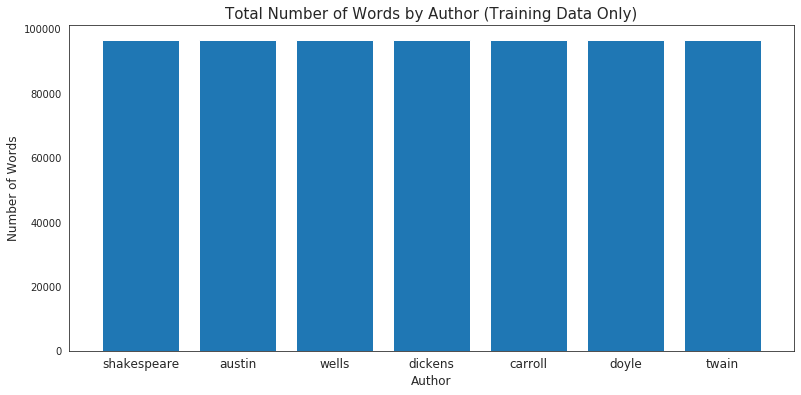

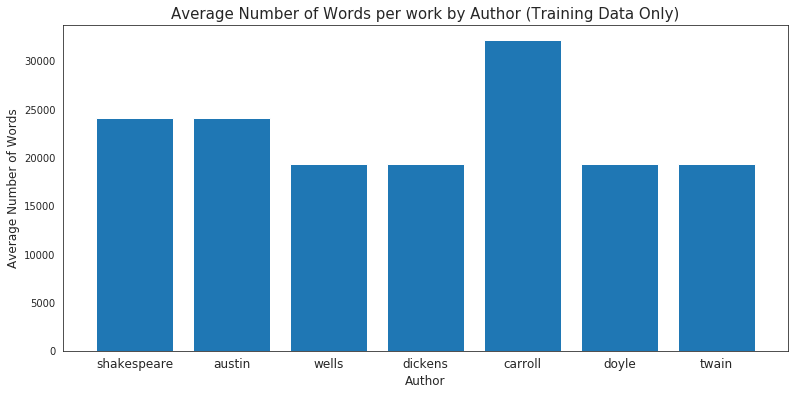

In [ ]:
# Creating a list of all the total number of words per author
auth_word_counts = []
for auth in authors:
    auth_word_count = 0
    for doc in auth_train[auth_train['author_'] == author]['doc_']:
        for token in doc:
            if not token.is_punct:  # not counting punctuation as a word
                auth_word_count += 1
    auth_word_counts.append(auth_word_count)  

auth_work_counts = []
for auth in authors:
    auth_work_counts.append(len(auth_train[auth_train['author_'] == auth]))

average_words_per_work = np.divide(auth_word_counts, auth_work_counts)    

# plotting our results
sns.set_palette('tab10')
plt.figure(figsize = (13,6))
plt.bar(height = auth_word_counts, x = authors)
plt.title('Total Number of Words by Author (Training Data Only)', fontsize = 15)
plt.ylabel('Number of Words', fontsize = 12)
plt.xlabel('Author', fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

plt.figure(figsize = (13,6))
plt.bar(height = average_words_per_work, x = authors)
plt.title('Average Number of Words per work by Author (Training Data Only)', fontsize = 15)
plt.ylabel('Average Number of Words', fontsize = 12)
plt.xlabel('Author', fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

### Clustering the data using Bag of Words first and then looking at other methods.  We will use the lemmas of words primarily

---



---



In [ ]:
auth_files_joined = []
for n in range(len(authors)): 
    auth_files_joined.append(' '.join(
        auth_train[auth_train['author_'] == authors[n]]['text_']))

# there is no simpleway of of joining the spacy docs together so this is the way I have used
auth_docs_joined = [] 
for index, auth_file_joined in enumerate(auth_files_joined):
    auth_docs_joined.append(nlp(auth_file_joined))
    print('converted the joined {} file to a spaCy doc'.format(authors[index]))

converted the joined shakespeare file to a spaCy doc
converted the joined austin file to a spaCy doc
converted the joined wells file to a spaCy doc
converted the joined dickens file to a spaCy doc
converted the joined carroll file to a spaCy doc
converted the joined doyle file to a spaCy doc
converted the joined twain file to a spaCy doc


### Creating the most common words (mcw) per Author

In [ ]:
mcw =50

In [ ]:
def b_o_w(doc, number_of_words_per_author):
  
  
  allwords = [] 
  for token in doc:
    if not token.is_punct and not token.is_stop:
      allwords.append(token.lemma_)
  return [item[0] for item in Counter(allwords).most_common(number_of_words_per_author)]  


### Creating the most common words between all the authors

In [ ]:
list_of_all_most_common_words = []
for n in range(len(authors)):
  list_of_all_most_common_words.extend(b_o_w(auth_docs_joined[n],mcw))
  
common_words = list(set(list_of_all_most_common_words))
print("The total of {} most common words for all authors".format(len(common_words)))

The total of 148 most common words for all authors


### Now we are going to create a new dataframe that uses the most common words

In [ ]:
def bow_features(df_init, common_words):
  
  # function that uses the original data frame of spacy docs, text files, author 
  # and a list of most common words to produce the new dataframe/matrix
  
  df =pd.DataFrame(columns = common_words)
  df['doc_'] = df_init.loc[:, 'doc_']
  df['text_'] = df_init.loc[:, 'text_']
  df['author_'] = df_init.loc[:, 'author_']
  df.loc[:, common_words] = 0
  
  for i, doc in enumerate(df['doc_']):
    words = []
    for token in doc:
      lemma = token.lemma_
      if lemma in common_words:
        words.append(lemma)
    
    for word in words:
      df.loc[i, word] += 1
      
    if i % 10 == 0:
      print("processing row {}".format(i))
  return df

In [ ]:
start = time.time()
df_bow_50 = bow_features(auth_train, common_words)
test_bow_50 = bow_features(auth_test, common_words)
end = time.time()
print (end - start)

processing row 0
processing row 10
processing row 20
processing row 30
processing row 0
processing row 10
processing row 20
59.16612195968628


In [ ]:
fifty_common_words = common_words 

In [ ]:
df_bow_50.head()

,Brutus,Mrs,night,oh,.He,get,leave,Gutenberg,stand,fear,sister,MACBETH,take,=,gentleman,see,time,1,right,door,mark,3,.BRUTUS,copy,know,Elinor,little,like,look,way,light,.I,.MACBETH,dear,doth,bear,Caesar,Watson,Mr,walk,...,family,find,answer,great,+,thou,sit,away,ALICE,John,house,have,sure,people,shall,suddenly,try,world,room,go,hope,Marianne,mean,make,tm,eye,Fanny,will,.It,Pickwick,begin,’s,hand,heart,Sir,soon,.CASSIUS,doc_,text_,author_
0,0,4,13,2,2,7,15,63,8,3,5,0,23,0,2,22,18,17,3,6,7,5,0,18,21,0,11,11,15,14,8,20,0,4,0,1,0,25,32,12,...,13,17,9,12,0,0,19,5,0,0,9,190,2,6,9,1,2,3,32,12,4,0,3,18,47,11,0,36,11,0,1,0,14,2,0,3,0,"(﻿Project, Gutenbergs, The, Adventure, of, the...",﻿Project Gutenbergs The Adventure of the Devil...,doyle
1,0,0,7,1,3,24,4,63,6,2,1,0,12,0,0,16,12,17,10,1,2,5,0,18,30,0,9,18,17,12,0,13,0,0,0,3,0,0,0,1,...,0,22,3,3,0,0,6,15,0,0,0,97,6,2,12,1,13,8,0,30,6,0,6,30,47,3,0,26,8,0,2,0,5,6,0,1,0,"(﻿Project, Gutenbergs, Eves, Diary, Complete, ...",﻿Project Gutenbergs Eves Diary Complete by Mar...,twain
2,0,4,27,2,38,49,42,2,31,8,0,0,61,0,4,112,48,2,31,35,3,2,0,2,56,0,72,75,44,35,35,36,0,8,0,5,0,0,19,17,...,1,62,7,24,0,0,30,24,0,0,18,422,5,31,14,32,31,31,67,99,6,0,17,60,0,61,0,54,38,0,45,145,48,10,0,12,0,"(﻿The, Project, Gutenberg, EBook, of, Thirty, ...",﻿The Project Gutenberg EBook of Thirty Strange...,wells
3,0,0,12,0,8,13,21,68,2,1,0,0,11,0,1,12,11,17,7,2,4,6,0,24,12,0,4,3,2,8,1,11,0,0,0,1,0,0,3,2,...,0,17,4,4,0,0,3,7,0,0,0,99,3,5,5,0,0,2,1,13,3,0,3,22,48,8,0,40,1,0,9,0,10,2,1,3,0,"(﻿The, Stolen, White, Elephant, by, Mark, Twai...",﻿The Stolen White Elephant by Mark TwainProjec...,twain
4,0,0,5,31,5,43,16,63,10,4,4,0,38,0,0,47,30,18,15,23,5,5,0,18,85,0,22,57,47,32,8,7,0,14,0,0,0,0,1,16,...,0,15,10,7,0,0,14,15,57,3,12,165,9,8,15,0,23,5,13,79,3,0,37,33,47,11,0,42,6,0,24,0,22,2,3,1,0,"(﻿The, Project, Gutenberg, EBook, of, Alice, i...",﻿The Project Gutenberg EBook of Alice in Wonde...,carroll


## K-Means Clustering 

In [ ]:
def k_means_cluster_analysis(X, y_true, params, 
                             description):
  numot = 15
  
  vmeas_scores = 0
  homog_scores = 0
  ari_scores = 0
  comp_scores = 0
  best_cluster =0
  ari_score =0
  
  for n_clusters in range(2,31): 
    mbkmeans = MiniBatchKMeans( **params, n_clusters = n_clusters,
                               random_state = 1)
    y_pred = mbkmeans.fit_predict(X)
    ari_scores= (metrics.adjusted_rand_score(y_true, y_pred))
    comp_scores= (metrics.completeness_score(y_true, y_pred))
    homog_scores= (metrics.homogeneity_score(y_true, y_pred))
    vmeas_scores= (metrics.v_measure_score(y_true, y_pred))
        
    if np.mean(ari_scores)> ari_score:
      ari_score = np.mean(ari_scores)
      best_cluster =n_clusters

    print ("n_clusters used: {}".format(n_clusters))
    #print('Using {}'.format(description))    
    print('ARI score: {}'.format(round(ari_scores, 3)))
    print('completeness score: {}'.format(round(comp_scores, 3)))
    print('homogeneity score: {}'.format(round(homog_scores, 3)))
    print('v-measure score: {}'.format(round(vmeas_scores, 3)) )

  print("best cluster was {} with ARI score of {}".format(best_cluster, ari_score))  


In [ ]:
def k_means_analysis(X, y_true, n_clusters, params, description):
  numot = 1
  
  vmeas_scores = []
  homog_scores = []
  ari_scores = []
  comp_scores = []
  
  for tr in range(numot):
    mbkmeans = MiniBatchKMeans( **params, n_clusters = n_clusters,
                               random_state = tr)
    y_pred = mbkmeans.fit_predict(X)
    ari_scores.append(metrics.adjusted_rand_score(y_true, y_pred))
    comp_scores.append(metrics.completeness_score(y_true, y_pred))
    homog_scores.append(metrics.homogeneity_score(y_true, y_pred))
    vmeas_scores.append(metrics.v_measure_score(y_true, y_pred))
    
    contin_table = pd.crosstab(y_pred, y_true)[authors]

    contin_table_norm = pd.DataFrame(normalize(np.array(contin_table), axis = 0, norm = 'l1'))
    contin_table_norm.columns = [authors]
    
    crosstab_normalized_T = pd.DataFrame(
        normalize(np.array(contin_table).T,  axis = 0, norm = 'l1'))
    crosstab_normalized_T.columns = range(n_clusters)
    
    #sns.set_palette('tab50')
    ax3 = contin_table_norm.T.plot(kind='bar', stacked=True, figsize = (6,4))
    ax3.set(xticklabels = authors)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('Fraction of author\'s works in K-Means Clusters\n Using '
              + str(description), fontsize = 12)
    plt.xlabel('Author', fontsize = 12)
    plt.ylabel('Fraction', fontsize = 12) 
    plt.legend(title = 'Cluster', title_fontsize = 12, bbox_to_anchor=(1, 1),
               prop={'size': 12})
    plt.ylim(0,1)
    plt.show()

    # plotting an authors cluster breakdown
    sns.set_palette('bright')
    ax4 = crosstab_normalized_T.T.plot(kind='bar', stacked=True, figsize = (6,4))
    ax4.set(ylabel='Fraction', xlabel='Cluster', xticklabels = range(len(authors)))
    plt.xticks([range(1,n_clusters)], fontsize = 12, rotation='horizontal')
    plt.yticks(fontsize = 12)
    plt.xlabel('Cluster', fontsize = 12)
    plt.ylabel('Fraction', fontsize = 12) 
    plt.legend(authors, title = 'Author', title_fontsize = 12,
               bbox_to_anchor=(1, 1), prop={'size': 12})
    plt.ylim(0,1)
    plt.title('The Relative Constituents of Each K-Means Cluster\n Using '
              + str(description), fontsize = 12)
    plt.show()

    
    # making a two scatter plots of the clusters labeled by predicted cluster 
    # and true class. We will plot their projection onto the two primary 
    # LSA components.
    
    # creating a data frame with the two LSA components
    lsa2 = TruncatedSVD(n_components=2)
    X_lsa2 = lsa2.fit_transform(X)
    df_lsa2 = pd.DataFrame(X_lsa2)
    df_lsa2['y_true'] = y_true
    df_lsa2['y_pred'] = y_pred
    df_lsa2['y_pred'] = df_lsa2['y_pred'].astype(str)

# plotting the speech along the 2 principal compontents of LSA 
    # (Latent Semantic Analysis) 
    plt.figure(figsize=(13,6))
    sns.set_palette("BrBG", 20)    
    plt.subplot(1, 2, 1)
    plt.title('K-Means Clusters Projected onto LSA Components\nUsing '
              + str(description), fontsize = 12)
    ax1 = sns.scatterplot(x = 0, y = 1, hue = 'y_pred', 
                          palette=['C0', 'C1', 'C2','C3','C4','C5',
                                   'C6','C7','C8','C9','C0', 'C1', 'C2','C3','C4','C5',
                                   'C6','C7','C8','C9'][:n_clusters], data = df_lsa2)
    legend = ax1.legend(fontsize = 10, title_fontsize = 12, prop={'size': 12})
    legend.texts[0].set_text("Cluster")
    plt.xlabel('LSA Component 0')
    plt.ylabel('LSA Component 1')
    
    plt.subplot(1, 2, 2)
    plt.title('Works byAuthor Projected onto LSA Components\nUsing '
              + str(description), fontsize = 12)
    ax2 = sns.scatterplot(x = 0, y = 1, hue = 'y_true', hue_order = authors,
                          palette = 'bright', data = df_lsa2)
    legend = ax2.legend(fontsize = 10, title_fontsize = 12, prop={'size': 12})
    legend.texts[0].set_text("Author")
    plt.xlabel('LSA Component 0')
    plt.ylabel('LSA Component 1')
    plt.show()

    print('Using {}'.format(description))    
    print('ARI score: {:.3f} +/- {:.3f}'.format(
        round(np.mean(ari_scores), 3),
        round(2*np.std(ari_scores)/np.sqrt(numot), 3)))
    print('completeness score: {:.3f} +/- {:.3f}'.format(
        round(np.mean(comp_scores), 3),
        round(2*np.std(comp_scores)/np.sqrt(numot), 3)))
    print('homogeneity score: {:.3f} +/- {:.3f}'.format(
        round(np.mean(homog_scores), 3),
        round(2*np.std(homog_scores)/np.sqrt(numot), 3)))
    print('v-measure score: {:.3f} +/- {:.3f}'.format(
        round(np.mean(vmeas_scores), 3), 
        round(2*np.std(vmeas_scores)/np.sqrt(numot), 3)))

In [ ]:
def k_means_scores(X, y_true, n_clusters, params, description):

    number_of_trials = 1
    
    ari_scores = []
    comp_scores = []
    homog_scores = []
    vmeas_scores = []
    
    for trial in range(number_of_trials):

        # we will use scikit-learns MiniBatchKMeans function
        minibatchkmeans = MiniBatchKMeans(**params, n_clusters=n_clusters,
                                          random_state=trial)
        # this uses the same 10 different random_states each time the code is run)

        # fitting k-means and predicting on our data
        y_pred = minibatchkmeans.fit_predict(X)
        ari_scores.append(metrics.adjusted_rand_score(y_true, y_pred))
        comp_scores.append(metrics.completeness_score(y_true, y_pred))
        homog_scores.append(metrics.homogeneity_score(y_true, y_pred))
        vmeas_scores.append(metrics.v_measure_score(y_true, y_pred))

    print('Using {}'.format(description))    
    print('ARI score: {:.3f} +/- {:.3f}'.format(
        round(np.mean(ari_scores), 3),
        round(2*np.std(ari_scores)/np.sqrt(number_of_trials), 3)))
    print('completeness score: {:.3f} +/- {:.3f}'.format(
        round(np.mean(comp_scores), 3),
        round(2*np.std(comp_scores)/np.sqrt(number_of_trials), 3)))
    print('homogeneity score: {:.3f} +/- {:.3f}'.format(
        round(np.mean(homog_scores), 3),
        round(2*np.std(homog_scores)/np.sqrt(number_of_trials), 3)))
    print('v-measure score: {:.3f} +/- {:.3f}'.format(
        round(np.mean(vmeas_scores), 3),
        round(2*np.std(vmeas_scores)/np.sqrt(number_of_trials), 3)))
  

### K-Means Results
#### Looking at our First graph we can see that none of our authors are grouped into the same cluster, this is our completeness score we calculated.  

#### The second visual respresents how much of a cluster comes from the same author.  After trialing several number of clusters it has been determined that the best results come from 20 clusters.  With this number of clusters we can get clusters that are completely comprised of a single author but the inverse is not true. We cannot reliably utilize 

In [ ]:
X_bow_50 = np.array(df_bow_50.drop(['doc_', 'text_', 'author_'], 1))
y_true = df_bow_50['author_']
n_clusters = 20
params = {}
description = '{} Most Common Words'.format(mcw)
k_means_cluster_analysis(X_bow_50, y_true, params, description)

n_clusters used: 2
ARI score: 0.04
completeness score: 0.337
homogeneity score: 0.119
v-measure score: 0.175
n_clusters used: 3
ARI score: 0.118
completeness score: 0.552
homogeneity score: 0.281
v-measure score: 0.372
n_clusters used: 4
ARI score: 0.229
completeness score: 0.657
homogeneity score: 0.436
v-measure score: 0.524
n_clusters used: 5
ARI score: 0.282
completeness score: 0.638
homogeneity score: 0.508
v-measure score: 0.566
n_clusters used: 6
ARI score: 0.18
completeness score: 0.557
homogeneity score: 0.45
v-measure score: 0.498
n_clusters used: 7
ARI score: 0.27
completeness score: 0.631
homogeneity score: 0.583
v-measure score: 0.606
n_clusters used: 8
ARI score: 0.306
completeness score: 0.637
homogeneity score: 0.638
v-measure score: 0.638
n_clusters used: 9
ARI score: 0.232
completeness score: 0.651
homogeneity score: 0.608
v-measure score: 0.629
n_clusters used: 10
ARI score: 0.14
completeness score: 0.563
homogeneity score: 0.539
v-measure score: 0.55
n_clusters used

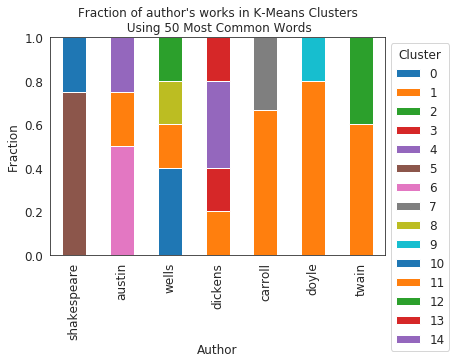

ValueError: ignored

<Figure size 432x288 with 1 Axes>

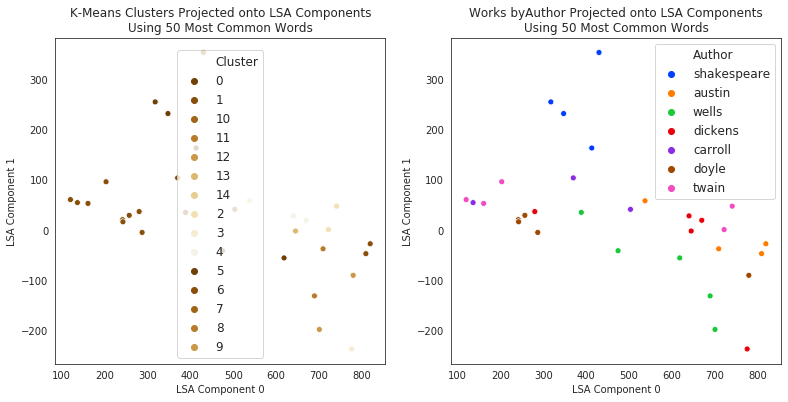

Using 50 Most Common Words
ARI score: 0.189 +/- 0.000
completeness score: 0.614 +/- 0.000
homogeneity score: 0.730 +/- 0.000
v-measure score: 0.667 +/- 0.000


In [ ]:
X_bow_50 = np.array(df_bow_50.drop(['doc_', 'text_', 'author_'], 1))
y_true = df_bow_50['author_']
n_clusters = 15
params = {}
description = '{} Most Common Words'.format(mcw)
k_means_analysis(X_bow_50, y_true, n_clusters, params, description)

### Trying to scale the features to improve performance

### Scaling has improved our results when combined with changing the number of clusters as well. 

In [ ]:
X_bow_50 = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 0)
y_true = df_bow_50['author_']
n_clusters = 15
params = {}
description = '50 Most Common Words and Scaling Each Feature'
k_means_cluster_analysis(X_bow_50, y_true, params, description)

n_clusters used: 2
ARI score: 0.063
completeness score: 0.385
homogeneity score: 0.137
v-measure score: 0.202
n_clusters used: 3
ARI score: 0.141
completeness score: 0.571
homogeneity score: 0.292
v-measure score: 0.387
n_clusters used: 4
ARI score: 0.211
completeness score: 0.654
homogeneity score: 0.414
v-measure score: 0.507
n_clusters used: 5
ARI score: 0.289
completeness score: 0.709
homogeneity score: 0.534
v-measure score: 0.609
n_clusters used: 6
ARI score: 0.3
completeness score: 0.691
homogeneity score: 0.561
v-measure score: 0.619
n_clusters used: 7
ARI score: 0.306
completeness score: 0.681
homogeneity score: 0.586
v-measure score: 0.63
n_clusters used: 8
ARI score: 0.341
completeness score: 0.696
homogeneity score: 0.661
v-measure score: 0.678
n_clusters used: 9
ARI score: 0.2
completeness score: 0.611
homogeneity score: 0.571
v-measure score: 0.591
n_clusters used: 10
ARI score: 0.236
completeness score: 0.638
homogeneity score: 0.631
v-measure score: 0.634
n_clusters use

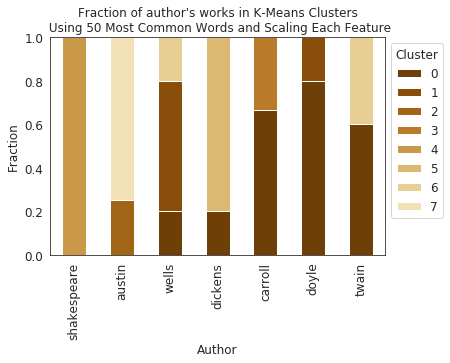

ValueError: ignored

<Figure size 432x288 with 1 Axes>

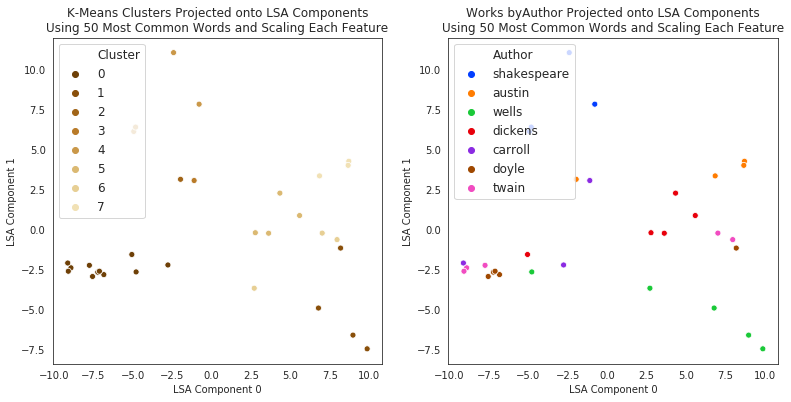

Using 50 Most Common Words and Scaling Each Feature
ARI score: 0.341 +/- 0.000
completeness score: 0.696 +/- 0.000
homogeneity score: 0.661 +/- 0.000
v-measure score: 0.678 +/- 0.000


In [ ]:
X_bow_50 = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 0)
y_true = df_bow_50['author_']
n_clusters = 8
params = {}
description = '50 Most Common Words and Scaling Each Feature'
k_means_analysis(X_bow_50, y_true, n_clusters, params, description)

### Scaling by Sample

In [ ]:
X_bow_50 = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
y_true = df_bow_50['author_']
params = {}
description = '{} Most Common Words and Scaling Each Sample'.format(mcw)
k_means_cluster_analysis(X_bow_50, y_true, params, description)

n_clusters used: 2
ARI score: 0.076
completeness score: 0.475
homogeneity score: 0.164
v-measure score: 0.244
n_clusters used: 3
ARI score: 0.079
completeness score: 0.465
homogeneity score: 0.218
v-measure score: 0.297
n_clusters used: 4
ARI score: 0.224
completeness score: 0.589
homogeneity score: 0.406
v-measure score: 0.481
n_clusters used: 5
ARI score: 0.129
completeness score: 0.485
homogeneity score: 0.368
v-measure score: 0.418
n_clusters used: 6
ARI score: 0.253
completeness score: 0.64
homogeneity score: 0.529
v-measure score: 0.579
n_clusters used: 7
ARI score: 0.282
completeness score: 0.601
homogeneity score: 0.562
v-measure score: 0.581
n_clusters used: 8
ARI score: 0.279
completeness score: 0.622
homogeneity score: 0.579
v-measure score: 0.599
n_clusters used: 9
ARI score: 0.411
completeness score: 0.677
homogeneity score: 0.702
v-measure score: 0.689
n_clusters used: 10
ARI score: 0.316
completeness score: 0.621
homogeneity score: 0.654
v-measure score: 0.637
n_clusters

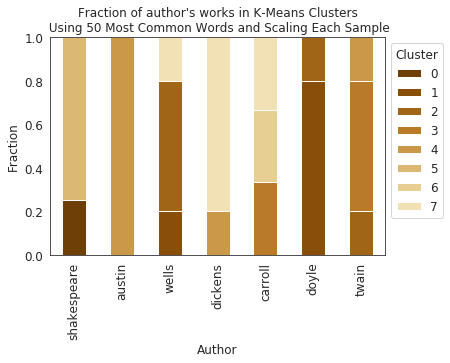

ValueError: ignored

<Figure size 432x288 with 1 Axes>

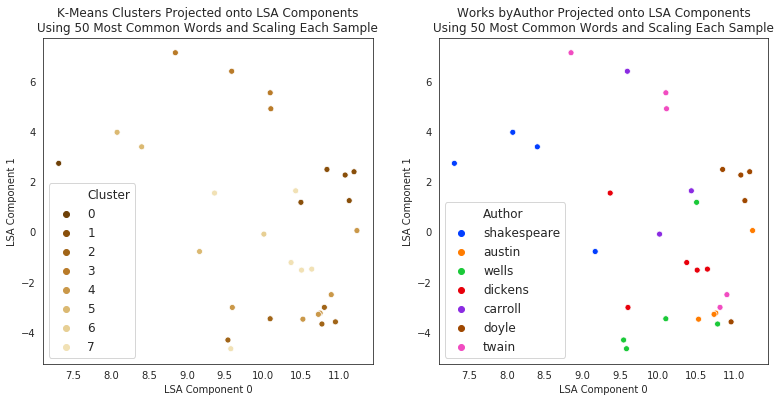

Using 50 Most Common Words and Scaling Each Sample
ARI score: 0.400 +/- 0.000
completeness score: 0.666 +/- 0.000
homogeneity score: 0.667 +/- 0.000
v-measure score: 0.667 +/- 0.000


In [ ]:

n_clusters = 8
description = '{} Most Common Words and Scaling Each Sample'.format(mcw)
k_means_analysis(X_bow_50, y_true, n_clusters, params, description)

### There seems to be slight advantage of scaling by samples. I have attempted a variety of clusters and seen some improvement. 

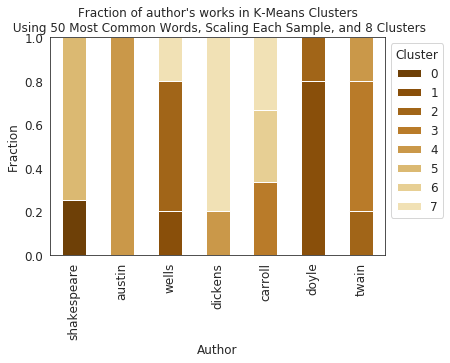

ValueError: ignored

<Figure size 432x288 with 1 Axes>

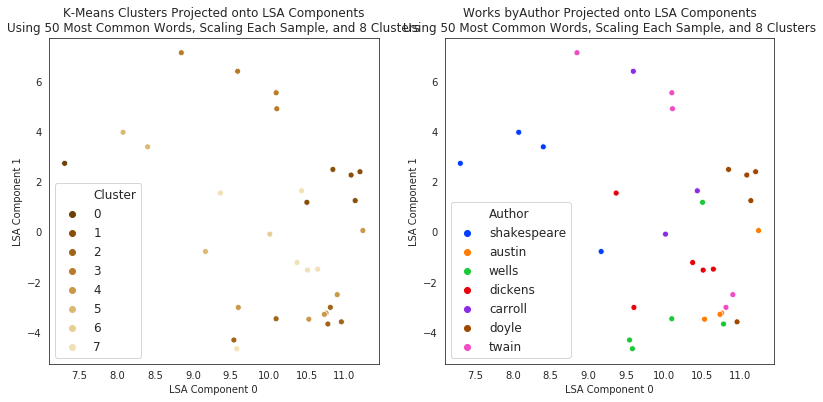

Using 50 Most Common Words, Scaling Each Sample, and 8 Clusters
ARI score: 0.400 +/- 0.000
completeness score: 0.666 +/- 0.000
homogeneity score: 0.667 +/- 0.000
v-measure score: 0.667 +/- 0.000


In [ ]:
X_bow_50 = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
y_true = df_bow_50['author_']
n_clusters = 8
params = {}
description = '{} Most Common Words, Scaling Each Sample, and {} Clusters'.format(mcw, n_clusters)
k_means_analysis(X_bow_50, y_true, n_clusters, params, description)

#### Attempting to use LSA-10 to see how that changes things.  It seesm to have a negative impact on our clustering. 

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=10, random_state=1)
X_lsa = lsa.fit_transform(X)
y_true = df_bow_50['author_']
n_clusters = 8
params = {}
description = '{} Most Common Words, Scaling Each Sample, and LSA-10'.format(mcw)
k_means_scores(X_lsa, y_true, n_clusters, params, description)

Using 50 Most Common Words, Scaling Each Sample, and LSA-10
ARI score: 0.297 +/- 0.000
completeness score: 0.613 +/- 0.000
homogeneity score: 0.605 +/- 0.000
v-measure score: 0.609 +/- 0.000


### We have tried 50 most common words now lets try our optimized result from before with the 500 most common words 

In [ ]:
mcw = 500

In [ ]:
list_of_all_most_common_words = []
for n in range(len(authors)):
  list_of_all_most_common_words.extend(b_o_w(auth_docs_joined[n],mcw))
  
common_words = list(set(list_of_all_most_common_words))
print("The total of {} most common words for all authors".format(len(common_words)))

The total of 1482 most common words for all authors


In [ ]:
start = time.time()
df_bow_500 = bow_features(auth_train, common_words)
end = time.time()
print(end - start)

processing row 0
processing row 10
processing row 20
processing row 30
226.39120602607727


In [ ]:
X = scale(np.array(df_bow_500.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=10, random_state=1)
X_lsa = lsa.fit_transform(X)
y_true = df_bow_500['author_']
n_clusters = 8
params = {}
description = '{} Most Common Words, scaling each sample, {} clusters  with {} components'.format(mcw,n_clusters, 10)
k_means_cluster_analysis(X_bow_50, y_true, params, description)

n_clusters used: 2
ARI score: 0.076
completeness score: 0.475
homogeneity score: 0.164
v-measure score: 0.244
n_clusters used: 3
ARI score: 0.079
completeness score: 0.465
homogeneity score: 0.218
v-measure score: 0.297
n_clusters used: 4
ARI score: 0.224
completeness score: 0.589
homogeneity score: 0.406
v-measure score: 0.481
n_clusters used: 5
ARI score: 0.129
completeness score: 0.485
homogeneity score: 0.368
v-measure score: 0.418
n_clusters used: 6
ARI score: 0.253
completeness score: 0.64
homogeneity score: 0.529
v-measure score: 0.579
n_clusters used: 7
ARI score: 0.282
completeness score: 0.601
homogeneity score: 0.562
v-measure score: 0.581
n_clusters used: 8
ARI score: 0.279
completeness score: 0.622
homogeneity score: 0.579
v-measure score: 0.599
n_clusters used: 9
ARI score: 0.411
completeness score: 0.677
homogeneity score: 0.702
v-measure score: 0.689
n_clusters used: 10
ARI score: 0.316
completeness score: 0.621
homogeneity score: 0.654
v-measure score: 0.637
n_clusters

In [ ]:
X = scale(np.array(df_bow_500.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=10, random_state=1)
X_lsa = lsa.fit_transform(X)
y_true = df_bow_500['author_']
n_clusters = 8
params = {}
description = '500 Most Common Words, Scaling Each Sample, and LSA-10'
k_means_scores(X_lsa, y_true, n_clusters, params, description)

Using 500 Most Common Words, Scaling Each Sample, and LSA-10
ARI score: 0.336 +/- 0.000
completeness score: 0.670 +/- 0.000
homogeneity score: 0.652 +/- 0.000
v-measure score: 0.661 +/- 0.000


#### Now we are going to plot the scores in a document-term matrix vs the number of LSA components and using a delta to step through the components.  The number of clusters is set to 8 currently. 

In [ ]:
def plotting_scores_vs_number_of_LSA_components(
    X, min_components, max_components, delta_components, number_of_trials):
    '''
    This function plots the four clustering scores of a document-term matrix
    versus the number of LSA components used. We input the matrix,
    the minimum and maximum number of LSA components to plot, along with
    a step size delta_components, and the number of trials to use for each
    number of LSA components.
    
    '''
    components = list(range(min_components, max_components, delta_components))
    
    mean_ari_scores = []
    sigma2_ari_scores = []
    mean_completeness_scores = []
    sigma2_completeness_scores = []
    mean_homogeneity_scores = []
    sigma2_homogeneity_scores = []
    mean_v_measure_scores = []
    sigma2_v_measure_scores = []

    for n_components in components:

        lsa = TruncatedSVD(n_components=n_components)
        X_lsa = lsa.fit_transform(X) 

        ari_scores = []
        completeness_scores = []
        homogeneity_scores = []
        v_measure_scores = []

        # Looping through k-means n times and recording statistics.
        for trial in range(number_of_trials):

            # we will use scikit-learns MiniBatchKMeans function
            minibatchkmeans = MiniBatchKMeans(**params, n_clusters=8)

            # fitting k-means and predicting on our data
            y_pred = minibatchkmeans.fit_predict(X_lsa)

            ari_scores.append(metrics.adjusted_rand_score(y_true, y_pred))
            completeness_scores.append(metrics.completeness_score(y_true, y_pred))
            homogeneity_scores.append(metrics.homogeneity_score(y_true, y_pred))
            v_measure_scores.append(metrics.v_measure_score(y_true, y_pred))

        mean_ari_scores.append(np.mean(ari_scores))
        sigma2_ari_scores.append(
            2*np.std(ari_scores)/np.sqrt(number_of_trials))
        mean_completeness_scores.append(np.mean(completeness_scores))
        sigma2_completeness_scores.append(
            2*np.std(completeness_scores)/np.sqrt(number_of_trials))
        mean_homogeneity_scores.append(np.mean(homogeneity_scores))
        sigma2_homogeneity_scores.append(
            2*np.std(homogeneity_scores)/np.sqrt(number_of_trials))
        mean_v_measure_scores.append(np.mean(v_measure_scores))
        sigma2_v_measure_scores.append(
            2*np.std(v_measure_scores)/np.sqrt(number_of_trials))
    # Plotting the two figures.    
    plt.figure(figsize=(15,15))

    plt.subplot(2, 2, 1)
    plt.errorbar(components, mean_ari_scores, yerr = sigma2_ari_scores, capsize=6)
    plt.title('ARI Scores vs Number of LSA Components')
    plt.xlabel('Number of LSA Components')
    plt.ylabel('ARI Score')
    plt.xticks(np.arange(min_components, max_components, delta_components))

    plt.subplot(2, 2, 2)    
    plt.errorbar(components, mean_completeness_scores, yerr = sigma2_completeness_scores, capsize=6)
    plt.title('Completeness Scores vs Number of LSA Components')
    plt.xlabel('Number of LSA Components')
    plt.ylabel('Completeness Score')
    plt.xticks(np.arange(min_components, max_components, delta_components))

    plt.subplot(2, 2, 3)    
    plt.errorbar(components, mean_homogeneity_scores, yerr = sigma2_homogeneity_scores, capsize=6)
    plt.title('Homogeneity Scores vs Number of LSA Components')
    plt.xlabel('Number of LSA Components')
    plt.ylabel('Homogeneity Score')
    plt.xticks(np.arange(min_components, max_components, delta_components))
    
    plt.subplot(2, 2, 4)    
    plt.errorbar(components, mean_v_measure_scores, yerr = sigma2_v_measure_scores, capsize=6)
    plt.title('V-Measure Scores vs Number of LSA Components')
    plt.xlabel('Number of LSA Components')
    plt.ylabel('V-Measure Score')
    plt.xticks(np.arange(min_components, max_components, delta_components))
    plt.show()          


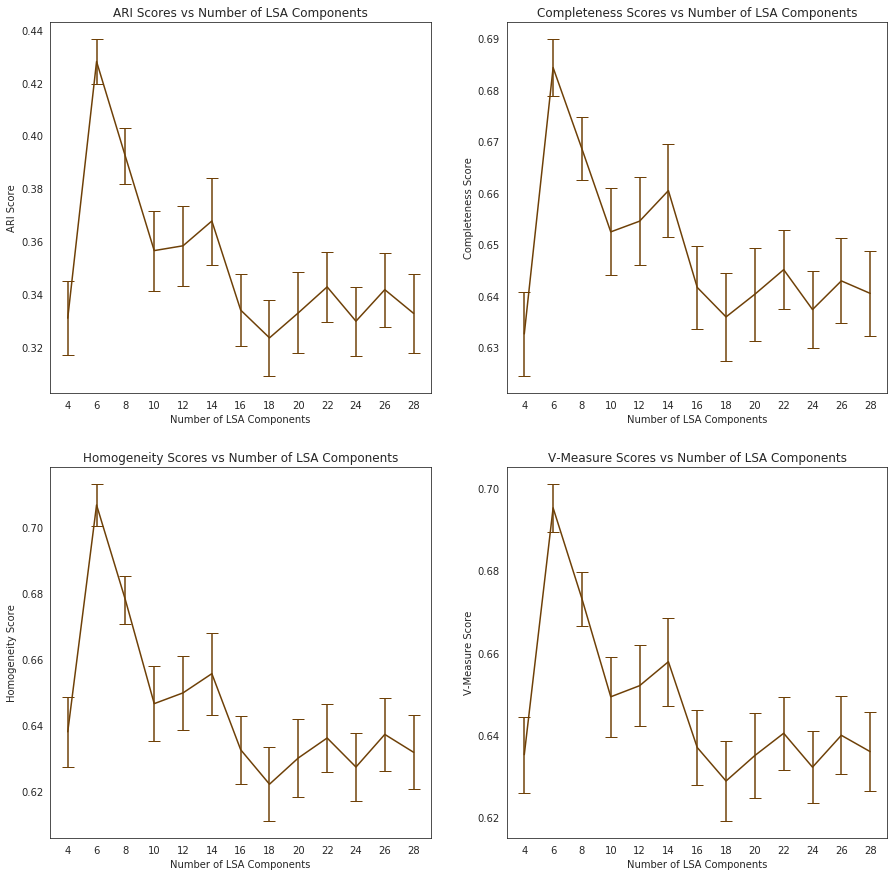

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
min_components = 4
max_components = 30
delta_components = 2
number_of_trials = 100
plotting_scores_vs_number_of_LSA_components(
    X, min_components, max_components, delta_components, number_of_trials)

### Results of our LSA component analysis
#### Based on the four plots and k-means scores generated the optimum k-means clustering is to use 500 common words per author, 8 clusters, scale by sample document and then apply LSA with 6 components. Compared to our original clustering this is double the ARI and the highest values for v-measure, homogenity and completeness we have seen so far.  

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=6, random_state=1)
X_lsa = lsa.fit_transform(X)
y_true = df_bow_50['author_']
n_clusters = 8
params = {}
description = '{} Most Common Words, Scaling Each Sample, and LSA-10'.format(mcw)
k_means_scores(X_lsa, y_true, n_clusters, params, description)

Using 500 Most Common Words, Scaling Each Sample, and LSA-10
ARI score: 0.483 +/- 0.000
completeness score: 0.707 +/- 0.000
homogeneity score: 0.737 +/- 0.000
v-measure score: 0.721 +/- 0.000


#### TF-IDF doc matrix


In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.6, 
                             min_df = 2,
                             stop_words ='english',
                             lowercase = True, 
                             use_idf = True,
                             norm = 'l2',
                             smooth_idf = True
                            )

vectorizer.fit(auth_files_joined)
                        
X_tfidf = vectorizer.transform(np.array(auth_train['text_']))                             

In [ ]:
vectorizer.fit(auth_files_joined)

auth_tfidf = pd.DataFrame(X_tfidf.toarray())
auth_tfidf.columns = vectorizer.get_feature_names()
auth_tfidf['author_'] = auth_train['author_']
auth_tfidf['text_'] = auth_train['text_']
auth_tfidf.head()

X_tfidf_test = vectorizer.transform(np.array(auth_test['text_']))

auth_tfidf_test = pd.DataFrame(X_tfidf_test.toarray())
auth_tfidf_test.columns = vectorizer.get_feature_names()
auth_tfidf_test['author_']  = auth_test['author_']
auth_tfidf_test['text_'] = auth_test['text_']



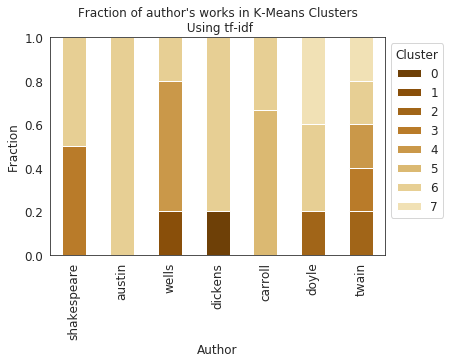

ValueError: ignored

<Figure size 432x288 with 1 Axes>

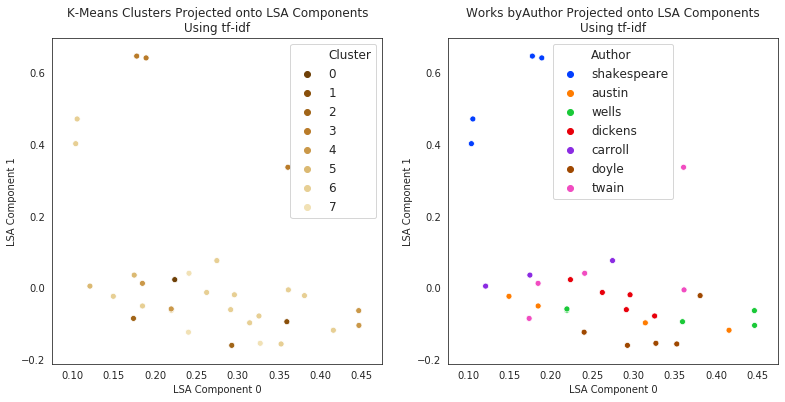

Using tf-idf
ARI score: 0.081 +/- 0.000
completeness score: 0.504 +/- 0.000
homogeneity score: 0.429 +/- 0.000
v-measure score: 0.463 +/- 0.000


In [ ]:
y_true = auth_tfidf['author_']
n_clusters = 8
params= {}
description = 'tf-idf'
k_means_analysis(X_tfidf, y_true, n_clusters, params, description)

### Now lets figure out the optimum number of LSA components for the optimum results

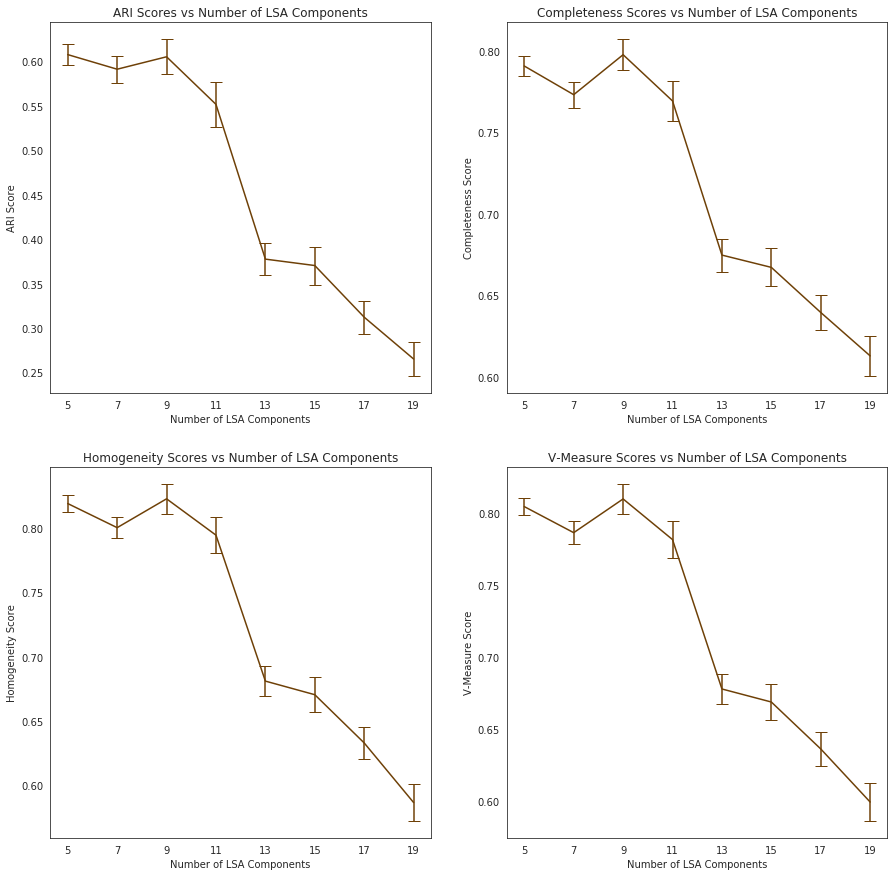

In [ ]:
X = X_tfidf
min_components = 5
max_components = 20
delta_components = 2
number_of_trials = 100
plotting_scores_vs_number_of_LSA_components(
    X, min_components, max_components, delta_components, number_of_trials)

In [ ]:
X_tfidf

<31x11051 sparse matrix of type '<class 'numpy.float64'>'
	with 39401 stored elements in Compressed Sparse Row format>

In [ ]:
X = X_tfidf
lsa = TruncatedSVD(n_components=8, random_state=1)
X_lsa = lsa.fit_transform(X)
y_true = df_bow_50['author_']
n_clusters = 8
params = {}
description = '{} Most Common Words, Scaling Each Sample, and LSA'.format(mcw)
k_means_scores(X_lsa, y_true, n_clusters, params, description)

Using 500 Most Common Words, Scaling Each Sample, and LSA
ARI score: 0.692 +/- 0.000
completeness score: 0.812 +/- 0.000
homogeneity score: 0.866 +/- 0.000
v-measure score: 0.838 +/- 0.000


### Iterating through different max_df and min_df parameters for our tf-idf document-term matrix

What do these parameters mean? If a term is said by more than df_max (an integer) authors we will not include that term in our tf-idf matrix. If a term is said by less than df_min (an integer) authors we will not include that term in our tf-idf matrix. 

[0.35844851659888194, 0.35757416054566366, 0.342200811845649]
[0.35844851659888194, 0.35757416054566366, 0.342200811845649]
[0.35844851659888194, 0.35757416054566366, 0.342200811845649]
[0.35844851659888194, 0.35757416054566366, 0.342200811845649]
[0.35844851659888194, 0.35757416054566366, 0.342200811845649]
[0.35844851659888194, 0.35757416054566366, 0.342200811845649]


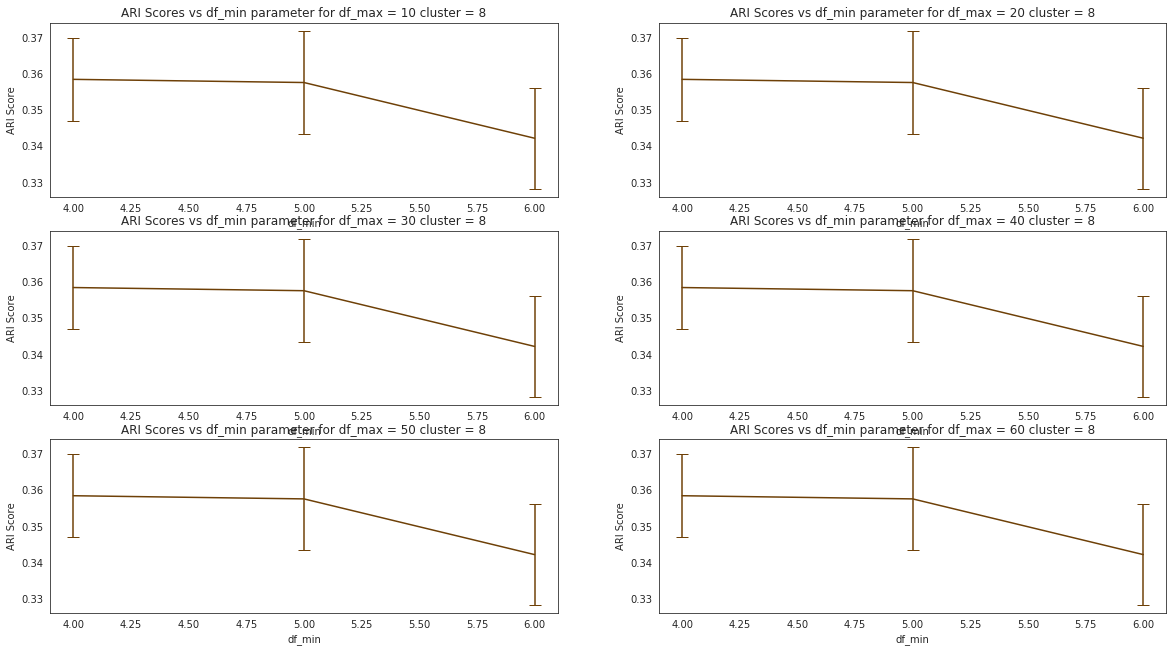

In [ ]:
max_dfs = [1,2,3,4,5,6]
min_dfs = [4,5,6]

number_of_trials = 100

plt.figure(figsize = (20,30))
for max_df in max_dfs:
    mean_ari_scores = []
    sigma2_ari_scores = []
    for min_df in min_dfs:
        ari_scores = []
        vectorizer = TfidfVectorizer(max_df=max_df*10, 
                             min_df=min_df,                                      
                             stop_words='english', 
                             lowercase=True, 
                                     # convert everything to lower case 
                             use_idf=True,                                    
                             norm='l2', 
                                     # we will normalize each row of our document 
                             smooth_idf=True 
                                     # Prevents divide-by-zero errors
                            )

        # we are choosing our features (terms) based on what would be best for determining 
        # which wrote that term.
        
        vectorizer.fit(auth_files_joined)
        # each row is a single speech
        X_tfidf = vectorizer.transform(np.array(auth_train['text_']))
        y_true = auth_tfidf['author_']
        # we are attemping to cluster each author but from past experience 8 works best  
        n_clusters = 8
        for trial in range(number_of_trials):
            minibatchkmeans = MiniBatchKMeans(
                **params, n_clusters=n_clusters, random_state=trial)
            y_pred = minibatchkmeans.fit_predict(X_tfidf)
            ari_scores.append(metrics.adjusted_rand_score(y_true, y_pred))
        # adding the mean score of ARI scores (for a specific combination of df_min and df_max)
        # to the list of mean scores for a given df_max. 
        mean_ari_scores.append(np.mean(ari_scores))
        sigma2_ari_scores.append(2*np.std(ari_scores)/np.sqrt(number_of_trials))
    print(mean_ari_scores)
    plt.subplot(8,2,max_df)
    plt.errorbar(min_dfs, mean_ari_scores, yerr = sigma2_ari_scores, capsize=6)
    plt.title('ARI Scores vs df_min parameter for df_max = {} cluster = {}'.format(max_df*10, n_clusters))
    plt.xlabel('df_min')
    plt.ylabel('ARI Score')

  

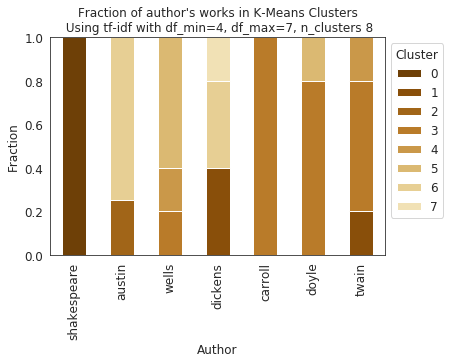

ValueError: ignored

<Figure size 432x288 with 1 Axes>

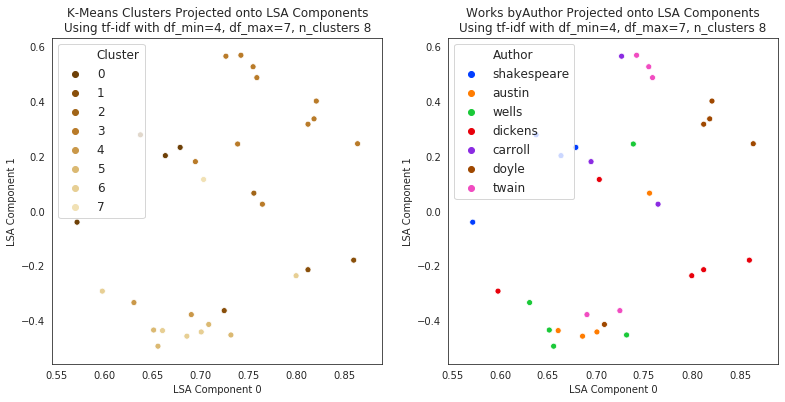

Using tf-idf with df_min=4, df_max=7, n_clusters 8
ARI score: 0.281 +/- 0.000
completeness score: 0.653 +/- 0.000
homogeneity score: 0.613 +/- 0.000
v-measure score: 0.633 +/- 0.000


In [ ]:
# setting the parameters of our tf-idf vectorizer
vectorizer = TfidfVectorizer(max_df=18, 
                             min_df=5, 
                             stop_words='english', 
                             lowercase=True, 
                             use_idf=True,
                             norm='l2', 
                             smooth_idf=True 
                            )

vectorizer.fit(auth_files_joined)

X_tfidf = vectorizer.transform(np.array(auth_train['text_']))

auth_tfidf = pd.DataFrame(X_tfidf.toarray())
auth_tfidf.columns = vectorizer.get_feature_names()
auth_tfidf['author_'] = auth_train['author_']
auth_tfidf['text_'] = auth_train['text_']

y_true = auth_tfidf['author_']
n_clusters = 8

params = {}
description = 'tf-idf with df_min=4, df_max=7, n_clusters {}'.format(n_clusters)
k_means_analysis(X_tfidf, y_true, n_clusters, params, description)

                           

### Using our best cluster algorithm
#### Using LSA with clustering appears to produce the best results.

In [ ]:
df_bow_50.shape

(31, 151)

In [ ]:
print(mcw)
test_bow_50 = []
start = time.time()
test_bow_50 = bow_features(auth_test, fifty_common_words)
end = time.time()
print(end - start)
print(mcw)

500
processing row 0
processing row 10
processing row 20
25.315922021865845
500


In [ ]:
test_bow_50.shape

(21, 151)

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y_true = df_bow_50['author_']
n_clusters = 8
params = {}
description = '{} Most Common Words, Scaling Each Sample, and LSA-9'.format(mcw)
k_means_scores(X_lsa, y_true, n_clusters, params, description)



Using 500 Most Common Words, Scaling Each Sample, and LSA-10
ARI score: 0.297 +/- 0.000
completeness score: 0.613 +/- 0.000
homogeneity score: 0.605 +/- 0.000
v-measure score: 0.609 +/- 0.000


In [ ]:
X.shape

(31, 148)

In [ ]:
X_lsa.shape


(31, 9)

In [ ]:
X_test = scale(np.array(test_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)


In [ ]:
X_test.shape


(21, 148)

In [ ]:
X_test = scale(np.array(test_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)


X_lsa_test = lsa.transform(X_test)
y_true_test = test_bow_50['author_']
n_clusters = 8
params = {}
description = '{} Most Common Words, Scaling Each Sample, and LSA-10'.format(mcw)
k_means_scores(X_lsa_test, y_true_test, n_clusters, params, description)

Using 500 Most Common Words, Scaling Each Sample, and LSA-10
ARI score: 0.365 +/- 0.000
completeness score: 0.725 +/- 0.000
homogeneity score: 0.733 +/- 0.000
v-measure score: 0.729 +/- 0.000


In [ ]:
X_lsa_test = lsa.transform(X_test)


In [ ]:
X_lsa_test = lsa.transform(X_test)

y_true_test = test_bow_50['author_']
n_clusters = 8
params = {}
description = '{} Most Common Words, Scaling Each Sample, and LSA-10'.format(mcw)
k_means_scores(X_lsa_test, y_true_test, n_clusters, params, description)

Using 500 Most Common Words, Scaling Each Sample, and LSA-10
ARI score: 0.365 +/- 0.000
completeness score: 0.725 +/- 0.000
homogeneity score: 0.733 +/- 0.000
v-measure score: 0.729 +/- 0.000


### Final results using 500 most common words 8 Clusters, 

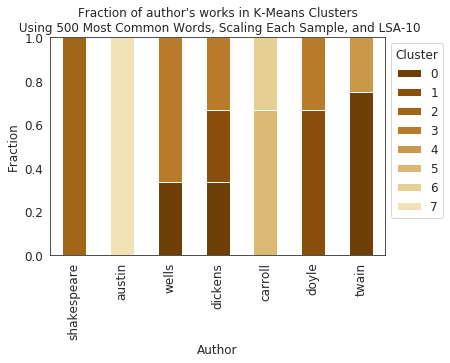

ValueError: ignored

<Figure size 432x288 with 1 Axes>

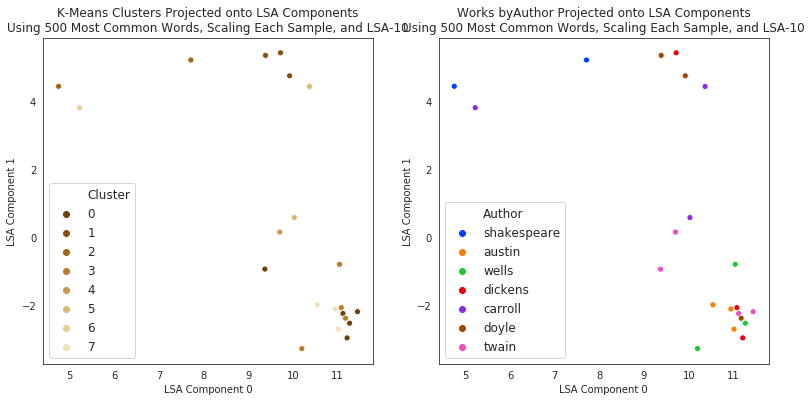

Using 500 Most Common Words, Scaling Each Sample, and LSA-10
ARI score: 0.365 +/- 0.000
completeness score: 0.725 +/- 0.000
homogeneity score: 0.733 +/- 0.000
v-measure score: 0.729 +/- 0.000


In [ ]:
k_means_analysis(X_lsa_test, y_true_test, n_clusters, params, description)

### SUPERVISED LEARNING

In [ ]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits =5, random_state=1)

### KNN 

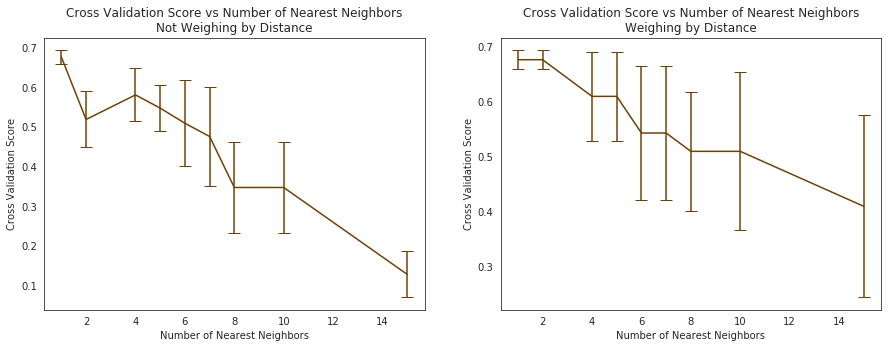

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values = [1, 2, 4, 5,6, 7, 8, 10, 15]
mean_scores = []
sigma2_scores = [] 

for value in values: 
    neighbors = KNeighborsClassifier(n_neighbors=value)
    cross_score = cross_val_score(neighbors, X_lsa, y, cv=kfolds)
    mean_scores.append(cross_score.mean())
    sigma2_scores.append(cross_score.std() * 2 / np.sqrt(len(cross_score)))

    
# Plotting the two figures.    
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.errorbar(values, mean_scores, yerr = sigma2_scores, capsize=6)
plt.title('Cross Validation Score vs Number of Nearest Neighbors\nNot Weighing by Distance')
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Cross Validation Score')


# weighing by distance

mean_scores = []
sigma2_scores = []
params = {'weights':'distance'}
for value in values: 
    neighbors = KNeighborsClassifier(n_neighbors=value, **params)
    cross_score = cross_val_score(neighbors, X_lsa, y, cv=kfolds)
    mean_scores.append(cross_score.mean())
    sigma2_scores.append(cross_score.std() * 2 / np.sqrt(len(cross_score)))


plt.subplot(1, 2, 2)
plt.errorbar(values, mean_scores, yerr = sigma2_scores, capsize=6)
plt.title('Cross Validation Score vs Number of Nearest Neighbors\nWeighing by Distance')
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values = [1, 2, 4, 5,6, 7, 8, 10, 15]
mean_score = []
sigma2_scores = []
params = {'weights':'distance'}
neighbors = KNeighborsClassifier(n_neighbors=4, **params)
cross_score = cross_val_score(neighbors, X_lsa, y, cv=kfolds)
mean_score.append(cross_score.mean())
print (cross_score)
print (mean_score)

[0.71428571 0.66666667 0.5        0.66666667 0.5       ]
[0.6095238095238095]


### Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values = [10,20,30,40,50,60,70,80,90]
susamples = [0.1, 0.3, 0.5, 0.7, 0.9]
rand_num = [1,3,5,7,9,11,13,15,17,19,21]
params = {}
mean_scores = []
sigma2_scores = []

parameters = {'n_estimators':values, 'subsample': susamples, 'random_state':rand_num}
gbc = GradientBoostingClassifier(verbose = 1, tol = 0.001)
grid_gbc = GridSearchCV(gbc, parameters, cv=3)
grid_gbc.fit(X_lsa, y)



      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.4685          -1.5743            0.03s
         2           1.4986          -1.5571            0.02s
         3           1.1454          -1.7077            0.02s
         4           1.4681          -0.5935            0.02s
         5           1.4976          -0.5152            0.01s
         6           1.4200          -1.5304            0.01s
         7           1.5109          -0.3317            0.01s
         8           1.4867          -0.2703            0.01s
         9           1.1374          -1.2335            0.00s
        10           1.0413          -3.9740            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           2.8533          -2.5488            0.02s
         2           2.8266           0.3824            0.02s
         3           2.8744           0.3013            0.02s
         4           2.9628          -1.6051            0.02s
      

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


        20           2.3837           0.0593            0.25s
        30           1.9291          -0.2123            0.20s
        40           1.3269           0.0064            0.17s
        50           0.7783          -0.0239            0.13s
        60           0.3857          -0.0140            0.10s
        70           0.2001          -0.0093            0.07s
        80           0.0637          -0.0062            0.03s
        90           0.0625          -0.0354            0.00s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  presort='auto',
  

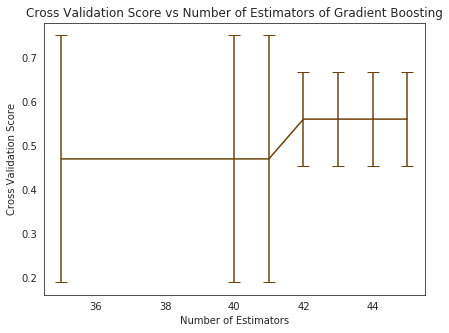

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values = [35,40,41,42,43,44,45]
params = {}
mean_scores = []
sigma2_scores = []

for value in values: 
    gbc = GradientBoostingClassifier(n_estimators = value, max_depth=3, 
                                     min_samples_leaf =1, subsample=1.0, 
                                     random_state=1, **params)
    cross_score = cross_val_score(gbc, X_lsa, y, cv=3)
    mean_scores.append(cross_score.mean())
    sigma2_scores.append(cross_score.std() * 2 / np.sqrt(len(cross_score)))

# Plotting the two figures.    
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.errorbar(values, mean_scores, yerr = sigma2_scores, capsize=6)
plt.title('Cross Validation Score vs Number of Estimators of Gradient Boosting')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
value = [42]
params = {}
mean_scores = []
sigma2_scores = []

gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                 learning_rate=0.1,loss='deviance',
                                 max_depth=3, max_features=None,
                                 max_leaf_nodes=None, min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2, min_weight_fraction_leaf=0.0,
                                 n_estimators=100, n_iter_no_change=None,
                                 presort='auto', random_state=1, subsample=1.0,
                                 tol=0.0001, validation_fraction=0.1, 
                                 verbose=0, warm_start=False, **params)
cross_score = cross_val_score(gbc, X_lsa, y, cv=3)
mean_scores.append(cross_score.mean())
sigma2_scores.append(cross_score.std() * 2 / np.sqrt(len(cross_score)))
print(cross_score)
print(cross_score.mean())

[0.61538462 0.63636364 0.42857143]
0.5601065601065601


### Logistic Regression








































































llll

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


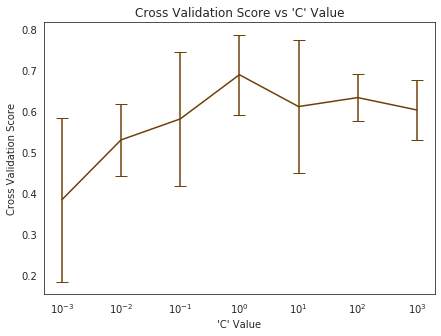

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values = [.001, .01, .1, 1, 10, 100, 1000]
params = {'multi_class':'auto', 'solver':'lbfgs', 'max_iter':500}
mean_scores = []
sigma2_scores = []

for value in values: 
    lr = LogisticRegression(C=value, **params)
    cross_score = cross_val_score(lr, X_lsa, y, cv=3)
    mean_scores.append(cross_score.mean())
    sigma2_scores.append(cross_score.std() * 2 / np.sqrt(len(cross_score)))

plt.figure(figsize=(7,5))
plt.xscale('log')
plt.errorbar(values, mean_scores, yerr = sigma2_scores, capsize=6)
plt.title('Cross Validation Score vs \'C\' Value')
plt.xlabel('\'C\' Value')
plt.ylabel('Cross Validation Score')
plt.show()

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values = [ 1]
params = {'multi_class':'auto', 'solver':'lbfgs', 'max_iter':500}
mean_scores = []
sigma2_scores = []

for value in values: 
    lr = LogisticRegression(C=value, **params)
    cross_score = cross_val_score(lr, X_lsa, y, cv=3)
    mean_scores.append(cross_score.mean())
    print(value, cross_score)
print(mean_scores)

1 [0.76923077 0.72727273 0.57142857]
[0.6893106893106893]


### Suppor Vector Machine

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
svclf = SVC(kernel='linear', random_state = 1) # using the a linear kernel
cross_score = cross_val_score(svclf, X_lsa, y, cv=3)
print('cross validation score = '+ str(round(cross_score.mean(),6)) +' +/- ' + str(round(cross_score.std()*2/np.sqrt(len(cross_score)),6)))


cross validation score = 0.684649 +/- 0.135375


### Random Forest

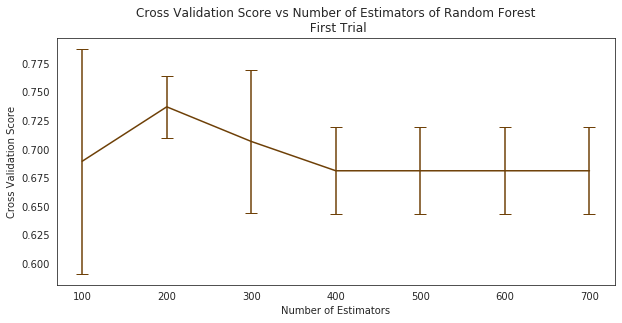

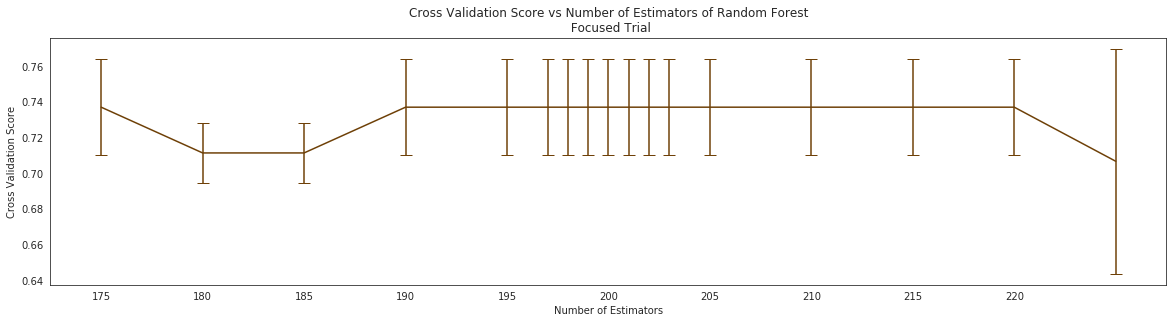

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values2 = [175, 180, 185, 190, 195, 197, 198, 199, 200, 201, 202, 203, 205 , 210, 215, 220, 225 ]
values1 = [100, 200, 300, 400, 500, 600, 700]
params = {}
mean_scores = []
sigma2_scores = []

for value in values1: 
    rfc = ensemble.RandomForestClassifier(n_estimators=value, random_state = 1, **params)
    cross_score = cross_val_score(rfc, X_lsa, y, cv=3)
    mean_scores.append(cross_score.mean())
    sigma2_scores.append(cross_score.std() * 2 / np.sqrt(len(cross_score)))

# Plotting the two figures.    
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.errorbar(values1, mean_scores, yerr = sigma2_scores, capsize=6)
plt.title('Cross Validation Score vs Number of Estimators of Random Forest\n First Trial')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross Validation Score')
plt.show()

mean_scores = []
sigma2_scores = []

for value in values2: 
    rfc = ensemble.RandomForestClassifier(n_estimators=value, random_state = 1, **params)
    cross_score = cross_val_score(rfc, X_lsa, y, cv=3)
    mean_scores.append(cross_score.mean())
    sigma2_scores.append(cross_score.std() * 2 / np.sqrt(len(cross_score)))
plt.figure(figsize=(20,10))
plt.subplot(2,1,2)
plt.errorbar(values2, mean_scores, yerr = sigma2_scores, capsize=6)
plt.title('Cross Validation Score vs Number of Estimators of Random Forest\n Focused Trial')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross Validation Score')
plt.xticks(range(175,225,5))
plt.show()

In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=9, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values2 = [185, 186, 187, 188, 189, 190, 191]
values1 = [190]
params = {}
mean_scores = []
sigma2_scores = []

for value in values1: 
    rfc = ensemble.RandomForestClassifier(n_estimators=value, random_state = 1, **params)
    cross_score = cross_val_score(rfc, X_lsa, y, cv=3)
    mean_scores.append(cross_score.mean())
    print(value, cross_score)
print(mean_scores)

190 [0.76923077 0.72727273 0.71428571]
[0.7369297369297371]


In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=12, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values2 = [190]
values1 = [90]
params = {}
mean_scores = []
sigma2_scores = []

for value in values2: 
    rfc = ensemble.RandomForestClassifier(n_estimators=value, random_state = 1, **params)
    cross_score = cross_val_score(rfc, X_lsa, y, cv=3)
    mean_scores.append(cross_score.mean())
    print(value, cross_score)
print(mean_scores)

190 [0.61538462 0.72727273 0.71428571]
[0.6856476856476856]


In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=20, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values2 = [190]
values1 = [90]
params = {}
mean_scores = []
sigma2_scores = []

for value in values2: 
    rfc = ensemble.RandomForestClassifier(n_estimators=value, random_state = 1, **params)
    cross_score = cross_val_score(rfc, X_lsa, y, cv=3)
    mean_scores.append(cross_score.mean())
    print(value, cross_score)
print(mean_scores)

190 [0.46153846 0.72727273 0.71428571]
[0.6343656343656344]


In [ ]:
X = scale(np.array(df_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)
lsa = TruncatedSVD(n_components=15, random_state=1)
X_lsa = lsa.fit_transform(X)
y = df_bow_50['author_']
values2 = [190]
values1 = [490]
params = {}
mean_scores = []
sigma2_scores = []

for value in values2: 
    rfc = ensemble.RandomForestClassifier(n_estimators=value, random_state = 1, **params)
    cross_score = cross_val_score(rfc, X_lsa, y, cv=3)
    mean_scores.append(cross_score.mean())
    print(value, cross_score)
print(mean_scores)

190 [0.61538462 0.90909091 0.71428571]
[0.7462537462537463]


In [ ]:
X_test = scale(np.array(test_bow_50.drop(
    ['doc_', 'text_', 'author_'], 1).astype('float64')), axis = 1)


X_lsa_test = lsa.transform(X_test)
y_true_test = test_bow_50['author_']


In [ ]:
X_train = X_lsa = lsa.fit_transform(X)
X_test = X_lsa_test

# our models target to train on and testing target
y_train = df_bow_50['author_']
y_test_true = test_bow_50['author_']


rfc = ensemble.RandomForestClassifier(n_estimators=300, random_state = 1, **params)
#rfc.fit(X_test, y_test_true)
cross_score = cross_val_score(rfc, X_test, y_test_true, cv=3)
mean_scores.append(cross_score.mean())
sigma2_scores.append(cross_score.std() * 2 / np.sqrt(len(cross_score)))
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)

print(value, cross_score)
print(mean_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


190 [0.75       0.71428571 0.66666667]
[0.7462537462537463, 0.7103174603174603]


In [ ]:
print (y_test_pred.shape)
print(X_test.shape)
print (y_test_true.shape)



(21,)
(21, 15)
(21,)


In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test_true, y_test_pred)
conf_mat = pd.DataFrame(cf)
print('We have achieved an accuracy score of {}%'.format(100*round(accuracy_score(y_test_true, y_test_pred), 3)))
print("\nWe utilized {} most common words from each text \n".format(mcw))
# formating the pandas dataframe which shows our confusion matrix
d = dict(selector="author",
    props=[('text-align', 'center')])

# printing our results
print('Our Confusion Matrix:\n(The rows are the true labels. The columns are our model\'s predictions)')
pd.DataFrame(cf, columns=authors, index=authors).style.set_properties(**{'width':'6em', 'text-align':'center'})\
        .set_table_styles([d])

#print(rfc.feature_importances_)


We have achieved an accuracy score of 71.39999999999999%

We utilized 500 most common words from each text 

Our Confusion Matrix:
(The rows are the true labels. The columns are our model's predictions)


,shakespeare,austin,wells,dickens,carroll,doyle,twain
shakespeare,3,0,0,0,0,0,0
austin,0,1,2,0,0,0,0
wells,0,0,0,1,0,1,1
dickens,0,0,0,3,0,0,0
carroll,0,0,0,0,2,0,0
doyle,0,0,0,0,1,3,0
twain,0,0,0,0,0,0,3


### Final results
#### The optimum model for predicting the authors was accomplished by using the 500 most common words (some overlapped with other texts)from each text, using Kmeans to cluster the texts into 8 clusters, scaling the data by each sampleand using LSA with 9 components.  We then ran it through random forest with 300 estimators. Using this model we are able to get an accuracy score of 71.4%.  

#### The model has issues differentiating between Jane Austin and H.G. Wells and fails to classify even one of the three H.G. Wells correctly.  It also failed to classify one out of four texts written by Sir Arthur Connan Doyle correctly and falsely classified one of the Wells texts as being a Doyle.  To improve the model we would need to expand the number of texts by each author and include 100% of the texts.  With the limitations of my computational power and memory allocation I am not able to accomplish those improvements. I feel confident that by increasing the sample size will allow for even better outcomes.  